## FT084 - Introdução a Mineração de Dados
---
### Tarefa 04: Regressão Múltipla  

Este código tem por objetivo a resolução de uma das etapas da tarefa em questão, que consiste na implementação de um algoritmo de regressão múltipla, analisando algumas medidas e selecionando os melhores atributos.  
Instruções para o experimento:
1. Encontrar o melhor conjunto de atributos. Qual é o melhor modelo de acordo com as medidas Cp, BIC, and R2 ajustado? Mostre gráficos para dar suporte a sua resposta e mostre os coeficientes do melhor modelo.
2. Repita o procedimento em (1), usando seleção progressiva e seleção regressiva. Como sua resposta agora se compara aos resultados do item (a)?
3. Realize a seleção de variáveis e de modelos usando validação cruzada no conjunto de treino.
4. Compare os modelos obtidos nos items (1), (2) e (3) no conjunto de teste. Qual deles é o melhor?

---

#### 1) Importação das bibliotecas  
Serão utilizados alguns pacotes para a implementação do código. São eles:
- pandas: leitura dos arquivos
- numpy, scipy: cálculo de algumas estatísticas
- sklearn: modelo de regressão, separação dos dados entre treino e teste, transformação dos atributos categóricos para numéricos (caso necessário), matriz de confusão, avaliação do erro, validação cruzada, seleção de atributos
- statsmodels: modelo de regressão
- matplotly.pyplot e plotly: visualizações extras

In [86]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import time
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### 2) Criação do dataset
Será gerado um objeto do tipo dataframe com a base de dados boston.

In [2]:
X, y = load_boston(return_X_y=True)
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.DataFrame(X, columns = columns[0:13]).astype('float64')
target = pd.DataFrame(y, columns = ['MEDV']).astype('float64')
target = target['MEDV']
dataset = pd.merge(data, target, left_index = True, right_index = True)

#### 3) Separação dos Dados
Aqui, os dados serão separados em treinamento e teste. O parâmetro *test_size* será definido primeiramente como 0.197 (19,7%) de acordo com o enunciado da tarefa.

In [3]:
# Divisão da base de dados entre treinamento e teste. Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado.
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.197, random_state = 0)

#### 4) Escolha do total de atributos
Será escrito um processo para, de forma iterativa, ir aumentando o número de atributos de 1 em 1 para analisar algumas métricas de cada modelo.

In [4]:
def processSubset(feature_set):
    # Criar um modelo para cada número de feature_set e encontrar o RSS
    model = sm.OLS(y_train,x_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(x_train[list(feature_set)]) - y_train) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [5]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(x_train.columns, k):
        results.append(processSubset(combo))
    
    # Colocando num datafram
    models = pd.DataFrame(results)
    
    # Escolhendo o modelo com o maior RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Retorna o melhor modelo com algumas informações extras
    return best_model

In [6]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,13):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 13 models on 1 predictors in 0.06612229347229004 seconds.
Processed 78 models on 2 predictors in 0.14162158966064453 seconds.
Processed 286 models on 3 predictors in 0.4936790466308594 seconds.
Processed 715 models on 4 predictors in 1.374324083328247 seconds.
Processed 1287 models on 5 predictors in 2.70833420753479 seconds.
Processed 1716 models on 6 predictors in 4.286248207092285 seconds.
Processed 1716 models on 7 predictors in 3.7331290245056152 seconds.
Processed 1287 models on 8 predictors in 2.739743709564209 seconds.
Processed 715 models on 9 predictors in 1.494065284729004 seconds.
Processed 286 models on 10 predictors in 0.5974247455596924 seconds.
Processed 78 models on 11 predictors in 0.16755223274230957 seconds.
Processed 13 models on 12 predictors in 0.026928186416625977 seconds.
Total elapsed time: 17.909953355789185 seconds.


In [7]:
# Imprimindo o dataframe com todos os melhores medelos para cada número de atributos
models_best

,RSS,model
1,23775.333267,<statsmodels.regression.linear_model.Regressio...
2,11659.109016,<statsmodels.regression.linear_model.Regressio...
3,10371.515257,<statsmodels.regression.linear_model.Regressio...
4,9642.805812,<statsmodels.regression.linear_model.Regressio...
5,9432.856050,<statsmodels.regression.linear_model.Regressio...
6,9268.303820,<statsmodels.regression.linear_model.Regressio...
7,9145.697994,<statsmodels.regression.linear_model.Regressio...
8,8977.857552,<statsmodels.regression.linear_model.Regressio...
9,8875.779570,<statsmodels.regression.linear_model.Regressio...
10,8803.727329,<statsmodels.regression.linear_model.Regressio...


In [61]:
print(models_best.loc[12, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              872.5
Date:                Thu, 13 May 2021   Prob (F-statistic):                   3.71e-275
Time:                        21:55:46   Log-Likelihood:                         -1200.1
No. Observations:                 406   AIC:                                      2424.
Df Residuals:                     394   BIC:                                      2472.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [63]:
print(getBest(7)["model"].summary())
modelo_RSS_Cp = getBest(11)['model']
modelo_R2 = getBest(9)['model']
modelo_BIC = getBest(7)['model']

Processed 1716 models on 7 predictors in 3.7517364025115967 seconds.
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                              1452.
Date:                Thu, 13 May 2021   Prob (F-statistic):                   2.17e-279
Time:                        21:57:06   Log-Likelihood:                         -1208.4
No. Observations:                 406   AIC:                                      2431.
Df Residuals:                     399   BIC:                                      2459.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>

Text(0, 0.5, 'BIC')

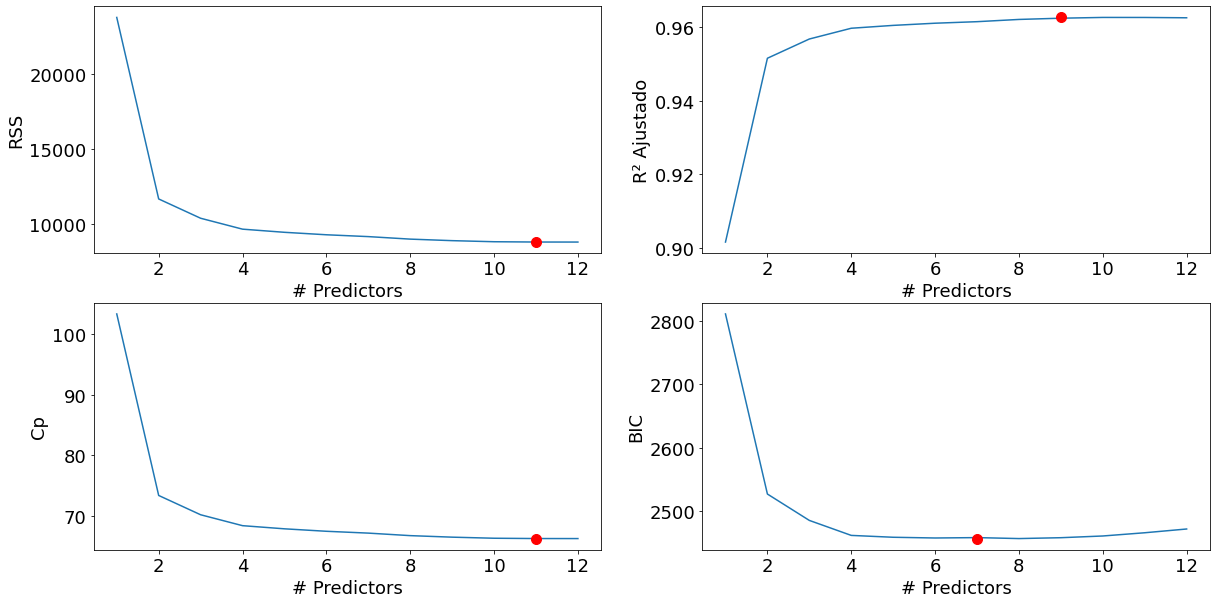

In [10]:
# Imprimindo 4 métricas para análise

# Criando a grade
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})
plt.subplot(2, 2, 1)

# RSS
plt.plot(models_best["RSS"])
plt.plot(models_best["RSS"].argmin(), models_best["RSS"].min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# R Quadrado Ajustado
rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('R² Ajustado')

# Cp
m = len(y_train)
p = 12
hat_sigma_squared = (1/(m - p -1)) * min(models_best["RSS"])
cp = (1/m) * (models_best["RSS"] + 2 * 406 * hat_sigma_squared )
plt.subplot(2, 2, 3)
plt.plot(cp)
plt.plot(cp.argmin(), cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

# BIC
bic = models_best.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

#### 5) Escolha do total de atributos com seleção progressiva e regressiva
Será escrito um processo para a seleção de atributos de acordo com as duas maneiras.

In [11]:
def forward(predictors):

    remaining_predictors = [p for p in x_train.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    return best_model

In [12]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(x_train.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  13 models on 1 predictors in 0.023935317993164062 seconds.
Processed  12 models on 2 predictors in 0.02094435691833496 seconds.
Processed  11 models on 3 predictors in 0.01994633674621582 seconds.
Processed  10 models on 4 predictors in 0.01795196533203125 seconds.
Processed  9 models on 5 predictors in 0.016954660415649414 seconds.
Processed  8 models on 6 predictors in 0.015957117080688477 seconds.
Processed  7 models on 7 predictors in 0.015957355499267578 seconds.
Processed  6 models on 8 predictors in 0.011968135833740234 seconds.
Processed  5 models on 9 predictors in 0.009973526000976562 seconds.
Processed  4 models on 10 predictors in 0.007978677749633789 seconds.
Processed  3 models on 11 predictors in 0.005997419357299805 seconds.
Processed  2 models on 12 predictors in 0.004986763000488281 seconds.
Processed  1 models on 13 predictors in 0.003987312316894531 seconds.
Total elapsed time: 0.20447397232055664 seconds.


In [13]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    return best_model

In [14]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(x_train.columns)))

tic = time.time()
predictors = x_train.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  13 models on 12 predictors in 0.028922557830810547 seconds.
Processed  12 models on 11 predictors in 0.0249330997467041 seconds.
Processed  11 models on 10 predictors in 0.02293872833251953 seconds.
Processed  10 models on 9 predictors in 0.029920339584350586 seconds.
Processed  9 models on 8 predictors in 0.026928424835205078 seconds.
Processed  8 models on 7 predictors in 0.019946575164794922 seconds.
Processed  7 models on 6 predictors in 0.015957117080688477 seconds.
Processed  6 models on 5 predictors in 0.014961481094360352 seconds.
Processed  5 models on 4 predictors in 0.010970354080200195 seconds.
Processed  4 models on 3 predictors in 0.008976221084594727 seconds.
Processed  3 models on 2 predictors in 0.0069811344146728516 seconds.
Processed  2 models on 1 predictors in 0.004986763000488281 seconds.
Total elapsed time: 0.2234025001525879 seconds.


#### 6) Impressão dos Resultados
Imprimindo qual é o melhor conjunto de atributos de acordo com cada uma das técnicas

In [15]:
print("------------")
print("Melhor conjunto de atributos:")
print("------------")
print(models_best.loc[8, "model"].params)

------------
Melhor conjunto de atributos:
------------
CRIM      -0.119332
ZN         0.040026
CHAS       2.598726
RM         5.806024
DIS       -0.593451
PTRATIO   -0.635027
B          0.014117
LSTAT     -0.423435
dtype: float64


In [64]:
print("-----------------")
print("Seleção progressiva:")
print("-----------------")
print(models_fwd.loc[8, "model"].params)
modelo_SP = models_fwd.loc[8, "model"]

-----------------
Seleção progressiva:
-----------------
RM         5.806024
LSTAT     -0.423435
PTRATIO   -0.635027
B          0.014117
CHAS       2.598726
CRIM      -0.119332
DIS       -0.593451
ZN         0.040026
dtype: float64


In [65]:
print("-------------------")
print("Seleção regressiva:")
print("-------------------")
print(models_bwd.loc[8, "model"].params)
modelo_SR = models_bwd.loc[8, "model"]

-------------------
Seleção regressiva:
-------------------
CRIM      -0.119332
ZN         0.040026
CHAS       2.598726
RM         5.806024
DIS       -0.593451
PTRATIO   -0.635027
B          0.014117
LSTAT     -0.423435
dtype: float64


#### 7) Validação Cruzada
Seleção dos atributos e dos modelos

In [18]:
# Criação do modelo
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [27]:
# Validação cruzada para seleção de atributos
selector = RFECV(model, step=1, cv=12)
selector = selector.fit(x_train,y_train)
selector.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True])

In [66]:
# Validação cruzada para seleção do modelo
x_train_test = x_train.drop(['AGE', 'B'], axis = 1)
x_test_test = x_test.drop(['AGE', 'B'], axis = 1)
model2 = LinearRegression()
cv_results = cross_validate(model2, x_train_test, y_train, return_estimator = True)
modelo_CV = cv_results['estimator'][0]

In [89]:
x_test_SP = x_test.drop(['INDUS', 'NOX', 'AGE', 'RAD', 'TAX'], axis = 1)
x_test_SR = x_test.drop(['INDUS', 'NOX', 'AGE', 'RAD', 'TAX'], axis = 1)
x_test_RSS_Cp = x_test.drop(['INDUS', 'NOX'], axis = 1)
x_test_R2 = x_test.drop(['INDUS', 'NOX','AGE', 'RAD'], axis = 1)
x_test_BIC = x_test.drop(['INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'ZN'], axis = 1)

prediction_SP = modelo_SP.predict(x_test_SP)
prediction_SR = modelo_SR.predict(x_test_SR)
prediction_CV = modelo_CV.predict(x_test_test)
prediction_RSS_Cp = modelo_RSS_Cp.predict(x_test_RSS_Cp)
prediction_R2 = modelo_R2.predict(x_test_R2)
prediction_BIC = modelo_BIC.predict(x_test_BIC)


accuracy_SP = r2_score(y_test, prediction_SP)
accuracy_SR = r2_score(y_test, prediction_SR)
accuracy_CV = r2_score(y_test, prediction_CV)
accuracy_RSS_Cp = r2_score(y_test, prediction_RSS_Cp)
accuracy_R2 = r2_score(y_test, prediction_R2)
accuracy_BIC = r2_score(y_test, prediction_BIC)

display(accuracy_SP)
display(accuracy_SR)
display(accuracy_CV)
display(accuracy_RSS_Cp)
display(accuracy_R2)
display(accuracy_BIC)

-610.9068396897391

0.5475530810020286

0.5870935418026557

0.5562318328439405

0.5444024380163353

0.5370010397800106